# Note:-

**Here you can see only one two question's answer for third phase. For SQL part answer please check the docx file where I write all queries with all screenshot of output.**

# Question:-

# 3.8.3	Store the above data (the result of 3.2) in DataFrame and analyze districts that appear 3 or more than 3 years and print the corresponding state/ut, district, murders, and year in descending order.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
df=pd.read_csv(r"D:\data trained\Capstone project\India_Crime - Copy\MaxMurderDistricts_Output.csv",sep=";")
df

,STATE,YEAR,DISTRICT,MURDERS
0,A & N ISLANDS,2001,ANDAMAN,13
1,A & N ISLANDS,2002,ANDAMAN,14
2,A & N ISLANDS,2003,ANDAMAN,16
3,A & N ISLANDS,2004,ANDAMAN,13
4,A & N ISLANDS,2005,ANDAMAN,14
...,...,...,...,...
415,WEST BENGAL,2008,24 PARGANAS SOUTH,239
416,WEST BENGAL,2009,24 PARGANAS NORTH,229
417,WEST BENGAL,2010,PASCHIM MIDNAPUR,268
418,WEST BENGAL,2011,24 PARGANAS SOUTH,247


In [5]:
# Group by district and count the number of years for each district 
district_count = df.groupby('DISTRICT')['YEAR'].count()
district_count

DISTRICT
24 PARGANAS NORTH     8
24 PARGANAS SOUTH     3
A and N ISLANDS       1
AHMEDABAD COMMR.      3
AIZAWL               10
                     ..
TINSUKIA              5
TRIVANDRUM            2
TRIVANDRUM RURAL      2
UDHAMSINGH NAGAR      2
WEST                 14
Name: YEAR, Length: 90, dtype: int64

In [8]:
# Filtering districts that appear 3 or more times
districts_3_or_more = district_count[district_count >= 3].index
districts_3_or_more

Index(['24 PARGANAS NORTH', '24 PARGANAS SOUTH', 'AHMEDABAD COMMR.', 'AIZAWL',
       'ALWAR', 'ANDAMAN', 'BANGALORE COMMR.', 'BARAMULLA', 'BHARATPUR',
       'BILASPUR', 'CHANDIGARH', 'CHENNAI', 'CP LUDHIANA', 'CYBERABAD',
       'D and N HAVELI', 'DAMAN', 'DELHI UT TOTAL', 'DIBRUGARH', 'DIMAPUR',
       'EAST', 'GURGAON', 'HARIDWAR', 'IMPHAL WEST', 'IMPHAL(WEST)', 'INDORE',
       'JAINTIA HILLS', 'JALANDHAR', 'JAMMU', 'JHABUA', 'KANGRA', 'KEONJHAR',
       'KHASI HILLS EAST', 'LAKSHADWEEP', 'LOHIT', 'LUDHIANA', 'MAYURBHANJ',
       'MUMBAI', 'MUMBAI COMMR.', 'MUZAFFARNAGAR', 'NORTH GOA', 'PALAKKAD',
       'PATNA', 'PONDICHERRY', 'PUDUCHERRY', 'RANCHI', 'SARGUJA', 'SONIPAT',
       'SUNDARGARH', 'SURAT COMMR.', 'THOUBAL', 'THRISSUR', 'TINSUKIA',
       'WEST'],
      dtype='object', name='DISTRICT')

In [9]:
# Filtering the DataFrame to include only the districts that appear 3 or more times
filtered_df_with_only_3_or_more_district = df[df['DISTRICT'].isin(districts_3_or_more)]
filtered_df_with_only_3_or_more_district

,STATE,YEAR,DISTRICT,MURDERS
0,A & N ISLANDS,2001,ANDAMAN,13
1,A & N ISLANDS,2002,ANDAMAN,14
2,A & N ISLANDS,2003,ANDAMAN,16
3,A & N ISLANDS,2004,ANDAMAN,13
4,A & N ISLANDS,2005,ANDAMAN,14
...,...,...,...,...
414,WEST BENGAL,2007,24 PARGANAS NORTH,194
415,WEST BENGAL,2008,24 PARGANAS SOUTH,239
416,WEST BENGAL,2009,24 PARGANAS NORTH,229
418,WEST BENGAL,2011,24 PARGANAS SOUTH,247


In [10]:
# Sorting the DataFrame by district and year in descending order
sorted_df = filtered_df_with_only_3_or_more_district.sort_values(by=['DISTRICT', 'YEAR'], ascending=[True, False])
sorted_df

,STATE,YEAR,DISTRICT,MURDERS
416,WEST BENGAL,2009,24 PARGANAS NORTH,229
414,WEST BENGAL,2007,24 PARGANAS NORTH,194
413,WEST BENGAL,2006,24 PARGANAS NORTH,154
412,WEST BENGAL,2005,24 PARGANAS NORTH,168
411,WEST BENGAL,2004,24 PARGANAS NORTH,177
...,...,...,...,...
351,SIKKIM,2004,WEST,5
375,TRIPURA,2004,WEST,97
374,TRIPURA,2003,WEST,136
373,TRIPURA,2002,WEST,113


# 3.8.4	Use appropriate graphs to show your data (the result of 3.8.3)

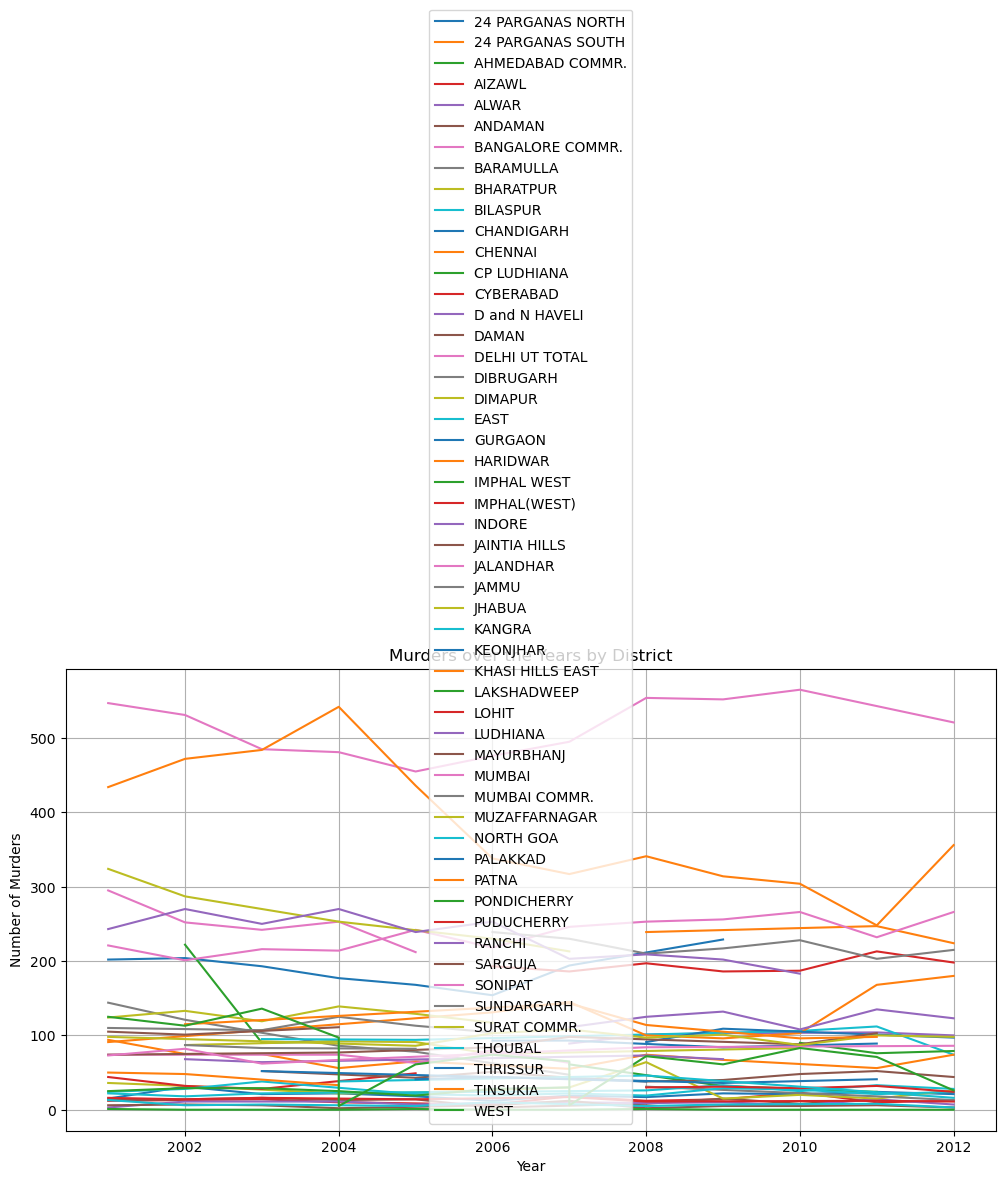

In [12]:
plt.figure(figsize=(12, 6))
for district, data in sorted_df.groupby('DISTRICT'):
    plt.plot(data['YEAR'], data['MURDERS'], label=district)
plt.title('Murders over the Years by District')
plt.xlabel('Year')
plt.ylabel('Number of Murders')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Observation:-**
    
*1) Here you can see also two of the most murder recorded District is Patna and Delhi UT Total.*

*2) For Delhi Murder rate is always high and it was little bit reduced between 2003 to 2008.*

*3) For Patna Murder rate is very high on 2004 but after that year Murder rate is drustically decreased.*

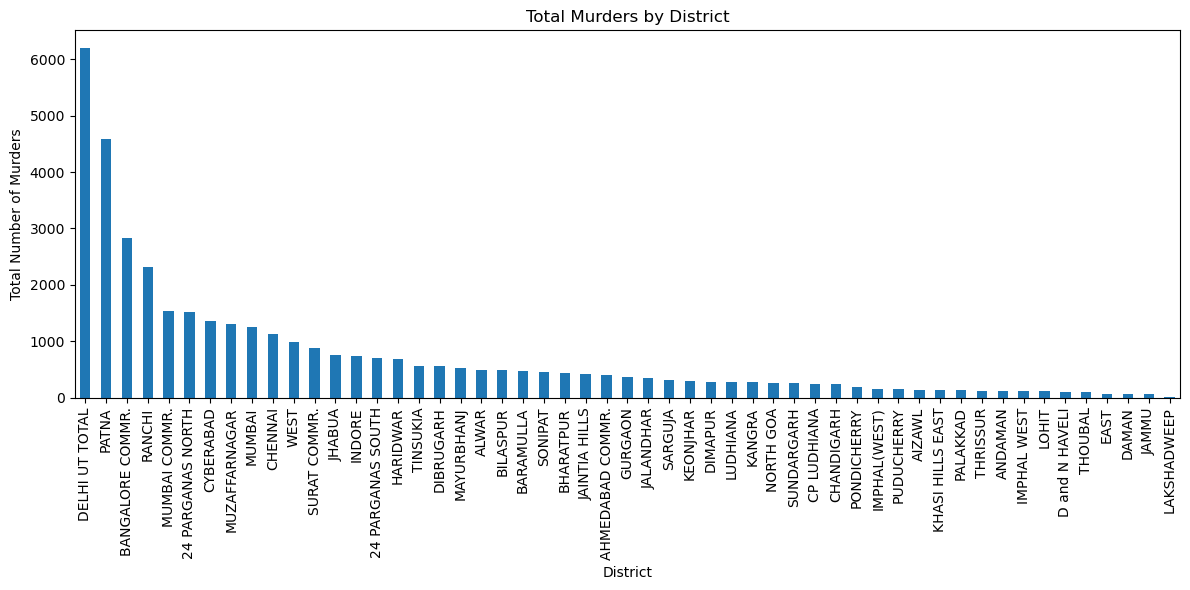

In [16]:

plt.figure(figsize=(12, 6))
total_murders_by_district = sorted_df.groupby('DISTRICT')['MURDERS'].sum().sort_values(ascending=False)
total_murders_by_district.plot(kind='bar')
plt.title('Total Murders by District')
plt.xlabel('District')
plt.ylabel('Total Number of Murders')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Observation:-**
    
*1) Here you can see the the DELHI UT TOTAL named district got the highest Murder count followed by PATNA.*

*2) Lakshadweep has least murder count.*